In [1]:
import os
import urllib
import zipfile
import re

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal as lps

import matplotlib.pyplot as plt
import matplotlib.collections as mplc
%matplotlib inline
import seaborn as sns
import shapely
from pysal.lib.cg import shapely_ext
from shapely import geometry as sgeom
from shapely.geometry import Point
import descartes as des
import pointpats 
from pointpats import PointPattern
from shapely import ops
from pointpats import PoissonPointProcess as ppp_csr
from pointpats import window
from pointpats.window import poly_from_bbox, as_window, Window, to_ccf
import pointpats.quadrat_statistics as qs

import warnings
warnings.simplefilter('ignore') 

<AxesSubplot:>

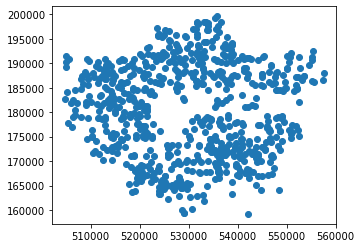

In [2]:
#allotment locations [.shp] 
url = 'https://data.london.gov.uk/download/allotment-locations/7f0af12b-bed3-4387-a2be-0531d1368c10/gla-allotment-locations-shp.zip'
path = os.path.join("data", "allotment_loc")

r = urllib.request.urlretrieve(url, path)

z = zipfile.ZipFile(path)
m = z.extractall("data")
allotments = gpd.read_file('data/gla-allotment-locations.shp')
allotments.plot()

In [3]:
f = ps.lib.io.open('data/gla-allotment-locations.shp')
#polys = [shp for shp in allotments] 
#boundary = shapely_ext.cascaded_union(polys)

In [4]:
pp_allotments = PointPattern(np.asarray([pnt for pnt in f]))
f.close()

pp_allotments.summary()

Point Pattern
741 points
Bounding rectangle [(504818.4229005856,159230.15009888785), (557515.8734419117,199577.20087573995)]
Area of window: 2126186712.8015366
Intensity estimate for window: 3.485112551680059e-07
               x              y
0  535942.959648  167853.561673
1  536249.906783  167898.018947
2  536251.695961  167397.022356
3  536291.956594  169784.328997
4  535658.142257  169028.575329


In [5]:
pp_allotments.window.area

2126186712.8015366

In [6]:
pp_allotments.window.centroid

(531167.1481712499, 179403.6754873143)

In [7]:
pp_allotments.window.bbox

[504818.4229005856, 159230.15009888785, 557515.8734419117, 199577.20087573995]

In [8]:
pp_allotments.window.contains_point((51.4986662, -0.0872523))

False

In [9]:
pp_allotments.window.parts

[[(504818.4229005856, 159230.15009888785),
  (504818.4229005856, 199577.20087573995),
  (557515.8734419117, 199577.20087573995),
  (557515.8734419117, 159230.15009888785),
  (504818.4229005856, 159230.15009888785)]]

In [10]:
pp_allotments.points

,x,y
0,535942.959648,167853.561673
1,536249.906783,167898.018947
2,536251.695961,167397.022356
3,536291.956594,169784.328997
4,535658.142257,169028.575329
...,...,...
736,535745.803747,182582.435577
737,534201.907811,173276.799287
738,533314.277513,175897.379154
739,538522.773306,183046.412765


In [10]:
pp_allotments.lambda_mbb

3.4851125516800617e-07

In [11]:
pp_allotments.lambda_hull

4.7022115937331125e-07

In [12]:
allotments = ps.lib.io.open('data/gla-allotment-locations.shp')
points = [shp for shp in allotments]

In [13]:
lsoas = ps.lib.io.open('/Users/zahrajasmin-uddin/Desktop/coding/principles-sds/data/LSOA_IMD/LSOA_IMD2019.shp')
polys = [shp for shp in lsoas]
boundary = shapely_ext.cascaded_union(polys)

In [14]:
type(boundary)

pysal.lib.cg.shapes.Polygon

In [17]:
print(len(polys))
print(len(points))

4835
741


In [15]:
w = as_window(boundary)
w.holes

[[(528860.8769998448, 177929.0149999783),
  (528777.882353664, 177935.55477050968),
  (528860.8769999391, 177929.01500012836),
  (528950.4129979915, 177922.53600022622),
  (528950.4130000735, 177922.5359999002),
  (528994.1145508632, 177913.64340856383),
  (528950.4129999581, 177922.53599980427),
  (528860.8769998448, 177929.0149999783)],
 [(524363.869902898, 171697.71995711746),
  (524376.4289998942, 171702.017999616),
  (524376.4289999151, 171702.0179998679),
  (524363.869902898, 171697.71995711746)],
 [(524376.4289999151, 171702.0179998679),
  (524370.034838875, 171866.7146205932),
  (524376.4290002993, 171702.01799989495),
  (524376.4290003055, 171702.01799975676),
  (524376.428999926, 171702.01799962684),
  (524376.4289999151, 171702.0179998679)],
 [(545061.8359999012, 180089.0480000283),
  (545047.1204148597, 180095.18784342147),
  (545061.835999927, 180089.0480000699),
  (545061.8359999012, 180089.0480000283)],
 [(545061.835999927, 180089.0480000699),
  (545063.0264670962, 18010

In [19]:
len(w.parts)

10

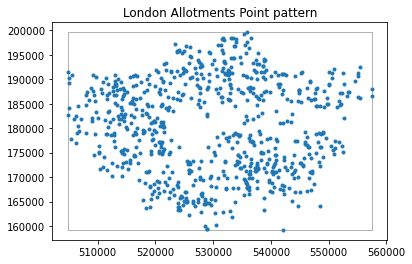

In [16]:
pp_allotments.plot(window=True, title= "London Allotments Point pattern")

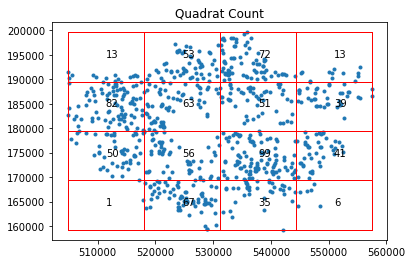

In [17]:
q_r_allotments = qs.QStatistic(pp_allotments, shape = 'rectangle', nx = 4, ny = 4)
q_r_allotments.plot()

In [18]:
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_r_allotments.chi2))
print('Degree of freedom is: '+str(q_r_allotments.df))
print('P-value for Chi-squared test statistic is: '+str.format('{0:.6f}', q_r_allotments.chi2_pvalue))

Chi-squared test statistic for the observed point pattern is: 252.57624831309042
Degree of freedom is: 15
P-value for Chi-squared test statistic is: 0.000000


can reject hypothesis of CSR due to p-value <0.05 

In [ ]:
q_h_allotments = qs.QStatistic(pp_allotments, shape = 'hexagon', lh=0.08)
q_h_allotments.plot()

In [ ]:
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_h_allotments.chi2))
print('Degree of freedom is: '+str(q_h_allotments.df))
print('P-value for Chi-squared test statistic is: '+str.format('{0:.6f}', q_h_allotments.chi2_pvalue))

In [ ]:
ldn_allotments = gpd.read_file('data/gla-allotment-locations.shp')

In [ ]:
from scipy import ndimage
def heatmap(d, bins=(50,50), smoothing=2, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]     

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx)) # get the x value from geometry, replace ???
    y = list(d.geometry.apply(gety)) # get the y value from geometry, replace ???
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins) # call numpy's 2D histogram function
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest') # scipy's ndimage
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)  # plot the heatmap
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
heatmap(ldn_allotments, bins=50, smoothing=2)

In [7]:
ldn_allotments.head()

,GLA_ID,REF,NAME,LOCATION,SUPPLIEDPO,NEARESTPOS,BOROUGH,ORGANISATI,FACILITIES,GRADE,COMMENTS,EASTING,NORTHING,LATITUDE,LONGITUDE,geometry
0,126,0,Abbots Way,Alongside railway line,BR3 3,CR0 7TX,Bromley,None,None,None,None,535943,167854,-0.047422,51.393386,POINT (535942.960 167853.562)
1,127,0,Adams Road,Alongside railway line at junction with Upper ...,BR3,BR3 4AX,Bromley,None,None,None,None,536250,167898,-0.042996,51.393712,POINT (536249.907 167898.019)
2,128,0,Aylesford Avenue,To north of Greenview Avenue,BR3 3,CR0 7QW,Croydon,None,None,None,None,536252,167397,-0.043162,51.389209,POINT (536251.696 167397.022)
3,129,0,Barnmead Road,Between Railway tracks north of Thayers Farm Road,BR3 1,BR3 4LY,Bromley,None,None,None,None,536292,169784,-0.041668,51.410653,POINT (536291.957 169784.329)
4,130,0,Beck Lane,North of Beck Lane and Central Terrace,BR3 4,BR3 4RF,Bromley,None,None,None,None,535658,169029,-0.051065,51.404014,POINT (535658.142 169028.575)


In [ ]:
lsoas_gdf= gpd.read_file('/Users/zahrajasmin-uddin/Desktop/coding/principles-sds/data/LSOA_IMD/LSOA_IMD2019.shp')
lsoas_gdf.head()

In [ ]:
lsoas_gdf = lsoas_gdf[['LAD11NM', 'geometry']]
colnames = ['borough', 'geometry']
lsoas_gdf.columns = colnames
lsoas_gdf.head(4)

In [ ]:
lsoas_allotments_count = pd.DataFrame(ldn_allotments['BOROUGH'].value_counts().astype(int)).reset_index()
lsoas_allotments_count.columns = ['borough', 'Numbers']
lsoas_allotments_count.head(4)

In [ ]:
join_gdf = lsoas_gdf.merge(lsoas_allotments_count, on='borough')
join_gdf.to_file(driver='ESRI Shapefile', filename='data/b_allotment_numbers.shp')

join_gdf.plot(column='Numbers', cmap='coolwarm', scheme='quantiles', alpha=0.7, legend=True)

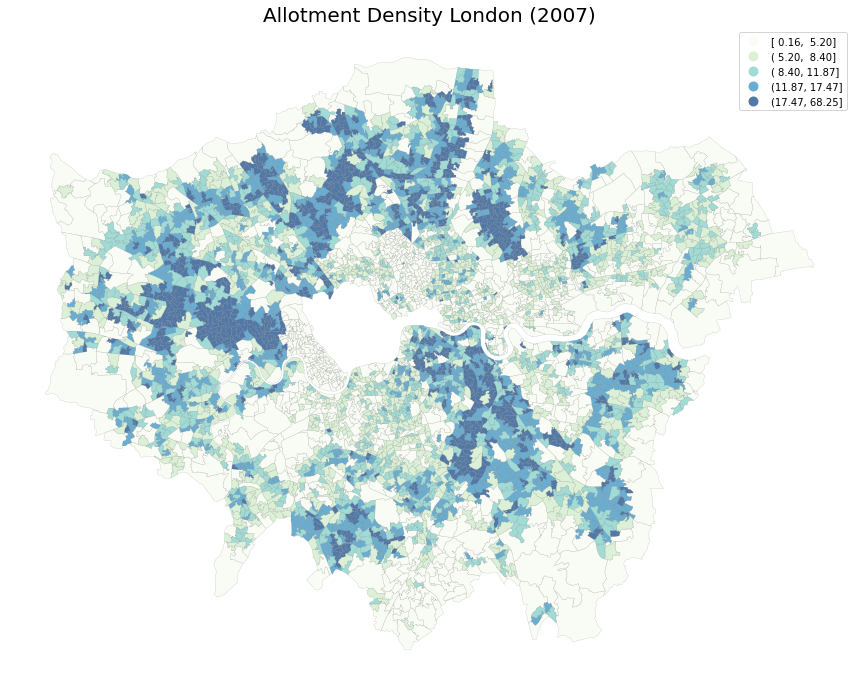

In [31]:
join_gdf['area']=join_gdf.geometry.area

join_gdf['density'] = join_gdf.apply(lambda row: 100000*row.Numbers / row.area, axis=1)
f, ax = plt.subplots(1, figsize=(20,12))
join_gdf.plot(column='density', cmap='GnBu', 
              scheme='quantiles', 
              alpha=0.7, legend=True, ax=ax, edgecolor='grey', linewidth=0.2
             )
plt.title('Allotment Density London (2007)', fontsize=20)
sns.despine()
ax.axis('off')
plt.show()